## Google Trends API - Python

First step: connect to Google

For this, we need to import the method called TrendReq from pytrends.request library.

In [15]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pytrend = TrendReq()

#### Interests by Region

Terms which are popular in the region worldwide.

In [3]:
pytrend.build_payload(kw_list=['AC Milan'])

# interest by region
df = pytrend.interest_by_region()
df.head()

,AC Milan
geoName,
Afghanistan,0
Albania,19
Algeria,13
American Samoa,0
Andorra,0


The values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term.

In [4]:
df.columns

Index(['AC Milan'], dtype='object')

In [10]:
df = pytrend.interest_by_region()
df = df.sort_values(by='AC Milan', ascending=False)
df.head(10)

,AC Milan
geoName,
Haiti,100
Congo - Kinshasa,52
Guinea,48
Senegal,45
Somalia,41
Uganda,40
Mali,36
Indonesia,34
Malta,31


Plot the results

In [28]:
df_top10 = df.reset_index()[:10]
df_top10

,geoName,AC Milan
0,Haiti,100
1,Congo - Kinshasa,52
2,Guinea,48
3,Senegal,45
4,Somalia,41
5,Uganda,40
6,Mali,36
7,Indonesia,34
8,Malta,31
9,Nigeria,27


In [31]:
sns.set_theme(style='whitegrid')
sns.color_palette('binary_d')

[(0.5725490196078432, 0.5725490196078432, 0.5725490196078432),
 (0.4758169934640524, 0.4758169934640524, 0.4758169934640524),
 (0.3816993464052288, 0.3816993464052288, 0.3816993464052288),
 (0.3139869281045752, 0.3139869281045752, 0.3139869281045752),
 (0.27633986928104576, 0.27633986928104576, 0.27633986928104576),
 (0.23764705882352943, 0.23764705882352943, 0.23764705882352943)]

<AxesSubplot:xlabel='AC Milan', ylabel='geoName'>

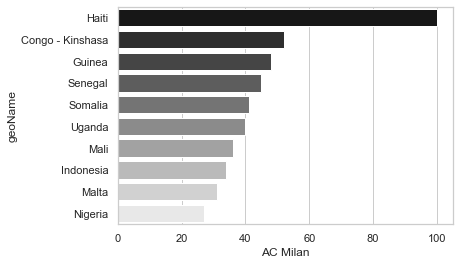

In [32]:
sns.barplot(x='AC Milan', y='geoName', data=df_top10, palette='binary_r')

#### Daily Search Trends

Get the top daily search trends worldwide. To do this we have to use the trending_searches() method. If you want to search worldwide just don’t pass any parameter.

In [33]:
# get google hot trends data
df2 = pytrend.trending_searches(pn='italy')
df2.head()

,0
0,Gigliola Cinquetti
1,Sam Ryder
2,Alessandro Cattelan
3,Konstrakta
4,Australia eurovision


_(Yesterday there was the 'Eurovision Song Contest' final)_

Compare the above results with the google trend’s result. To get today’s trending topics just use:

In [35]:
# df2bis = pytrend.today_searches(pn='IT')
# df2bis.head(10)

#### Top Charts

2021 trending with `top_charts` method, to get the top trending searches yearly.

In [36]:
# get google top charts
df3 = pytrend.top_charts(2021, hl='en-US', tz=300, geo='GLOBAL')
df3.head(10)

,title,exploreQuery
0,Australia vs India,
1,India vs England,
2,IPL,
3,NBA,
4,Euro 2021,
5,Copa América,Copa America
6,India vs New Zealand,
7,T20 World Cup,
8,Squid Game,
9,DMX,


#### Google Keyword Suggestions

![keyword-sugg](https://miro.medium.com/max/1400/1%2AQRpWWBS1SHXBr71Jp1NwQA.png)

In [38]:
# get google keyword suggestions
keywords = pytrend.suggestions(keyword='Samsung Galaxy')
df4 = pd.DataFrame(keywords)
# df4.drop(columns='mid')
df4.head()

,mid,title,type
0,/m/0hnbsn3,Samsung Galaxy,Mobile phone
1,/g/11n1093hj1,Samsung Galaxy A12,Mobile phone
2,/g/11qpyb3y70,Samsung Galaxy S21,Mobile phone
3,/g/11r3_75bd9,Samsung Galaxy A52,Mobile phone
4,/g/11fqkx3y9g,Samsung Galaxy S20,Mobile phone


#### Related Queries

Queries related to the main topic searched.

In [39]:
pytrend.build_payload(kw_list=['Apple'])

In [40]:
# related queries, output dictionary of dataframes
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                   query  value
0           apple watch    100
1          apple iphone     61
2                iphone     61
3           apple store     46
4              apple tv     32
5              apple id     29
6           apple cider     23
7            apple ipad     20
8                  ipad     20
9           apple music     19
10  apple cider vinegar     18
11                  app     15
12                  bmw     14
13                loans     14
14                 benz     14
15            apple pay     14
16          apple phone     13
17          apple stock     13
18        apple macbook     12
19              macbook     12
20              binance     12
21                  mac     12
22            apple mac     12
23        apple watch 3     11
24        airpods apple     11, 'rising':                    query   value
0                binance  231300
1            job hunting  169200
2                    btc   93750
3              iphone xr   423

Similarly for related topics.

In [41]:
# related topics, output dictionary of dataframes
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':      value formattedValue                                            link  \
0   225500       Breakout  /trends/explore?q=/g/11hcz1r4wl&date=today+5-y   
1   100200       Breakout  /trends/explore?q=/g/11gmzlpgdw&date=today+5-y   
2    46700       Breakout  /trends/explore?q=/g/11fctqqz2z&date=today+5-y   
3    46200       Breakout  /trends/explore?q=/g/11fcsjng2t&date=today+5-y   
4    42250       Breakout  /trends/explore?q=/g/11h_72mt0r&date=today+5-y   
5    40700       Breakout      /trends/explore?q=/m/083br0&date=today+5-y   
6    38400       Breakout  /trends/explore?q=/g/11h_7wzlls&date=today+5-y   
7    35700       Breakout  /trends/explore?q=/g/11kdmhhpxd&date=today+5-y   
8    32300       Breakout  /trends/explore?q=/g/11fctqsck9&date=today+5-y   
9    27300       Breakout  /trends/explore?q=/g/11j0jgqk7p&date=today+5-y   
10   25400       Breakout  /trends/explore?q=/g/11h_9xlndc&date=today+5-y   
11   24050       Breakout  /trends/explore?q=/g/11lj